# Singular Value Decomposition of the MNIST Dataset
### Import Packages

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [85]:
# Plotting function
def plot(data, n_plots, title="Singular Values", xlabel="Index", ylabel="Value", digit_form=False):
    if digit_form:
        fig, axes = plt.subplots(1, n_plots, figsize=(n_plots, 1))

        for i in range(n_plots):
            ax = axes[i]
            ax.imshow(data[i].reshape(28, 28), cmap='gray')
            ax.axis('off')

        plt.show()
        return

    if n_plots == 1:
        # Plotting the value vs index of the singular values
        plt.figure(figsize=(10, 5))
        plt.plot(range(len(data)), data, marker='.', linestyle='-')
        plt.title(title + " Linear Plot")
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(True)
        plt.show()
        return

    elif n_plots == 2:
        # Plot linear and semi-log
        fig, (graph_1, graph_2) = plt.subplots(1, 2, figsize=(20, 5))

        # linear
        graph_1.plot(range(len(data)), data, marker='o', linestyle='-')
        graph_1.set_title(title + " Linear Plot")
        graph_1.set_xlabel(xlabel)
        graph_1.set_ylabel(ylabel)

        # semi-log
        graph_2.semilogy(range(len(data)), data, marker='o', linestyle='-')
        graph_2.set_title(title + " Semi-Log Plot")
        graph_2.set_xlabel(xlabel)
        graph_2.set_ylabel(ylabel)
        plt.tight_layout()
        plt.show()
        return
        
    else:
        return 'invalid'

### Import dataset

In [59]:
(x_train, _), (x_test, _) = mnist.load_data()

n_train, _, _ = x_train.shape
n_test, _, _ = x_test.shape

# Transform into row vectors
x_train_reshaped = x_train.reshape(n_train, -1)
x_test_reshaped = x_test.reshape(n_test, -1)
data_row_vectors = np.concatenate((x_train_reshaped, x_test_reshaped), axis=0)
data_row_vectors.shape

(70000, 784)

### Plot the Initial Digits

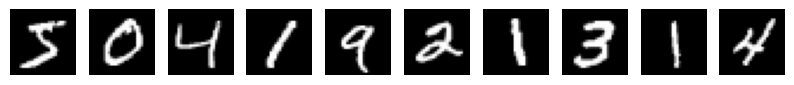

In [84]:
plot(data=data_row_vectors, n_plots=10, digit_form=True)

### SVD on Row Vectors

In [16]:
U, E, Vt = np.linalg.svd(data_row_vectors, full_matrices=False)

print('U matrix shape: ', U.shape)
print('E matrix shape: ', E.shape)
print('V transpose matrix shape: ', Vt.shape)

U matrix shape:  (70000, 784)
E matrix shape:  (784,)
V transpose matrix shape:  (784, 784)


### Plotting Singular Values

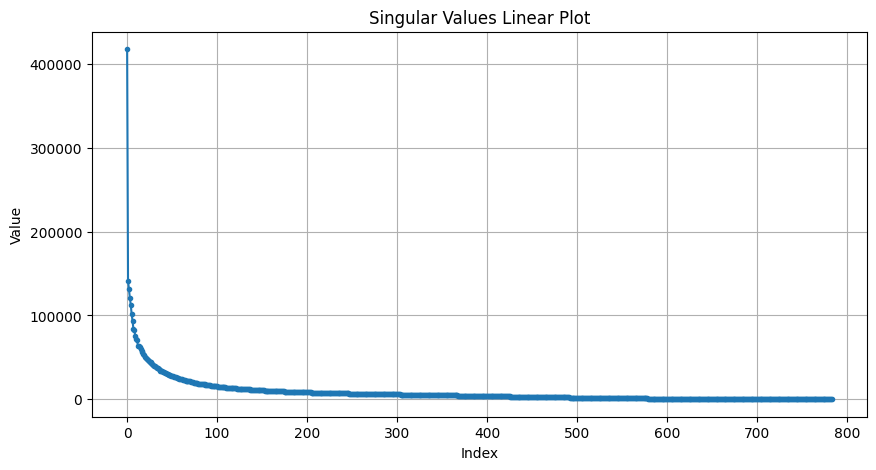

In [75]:
plot(data=E, n_plots=1)

#### The graph (linear scale) shows a very sharp initial decrease but flattens out after a few hundred values

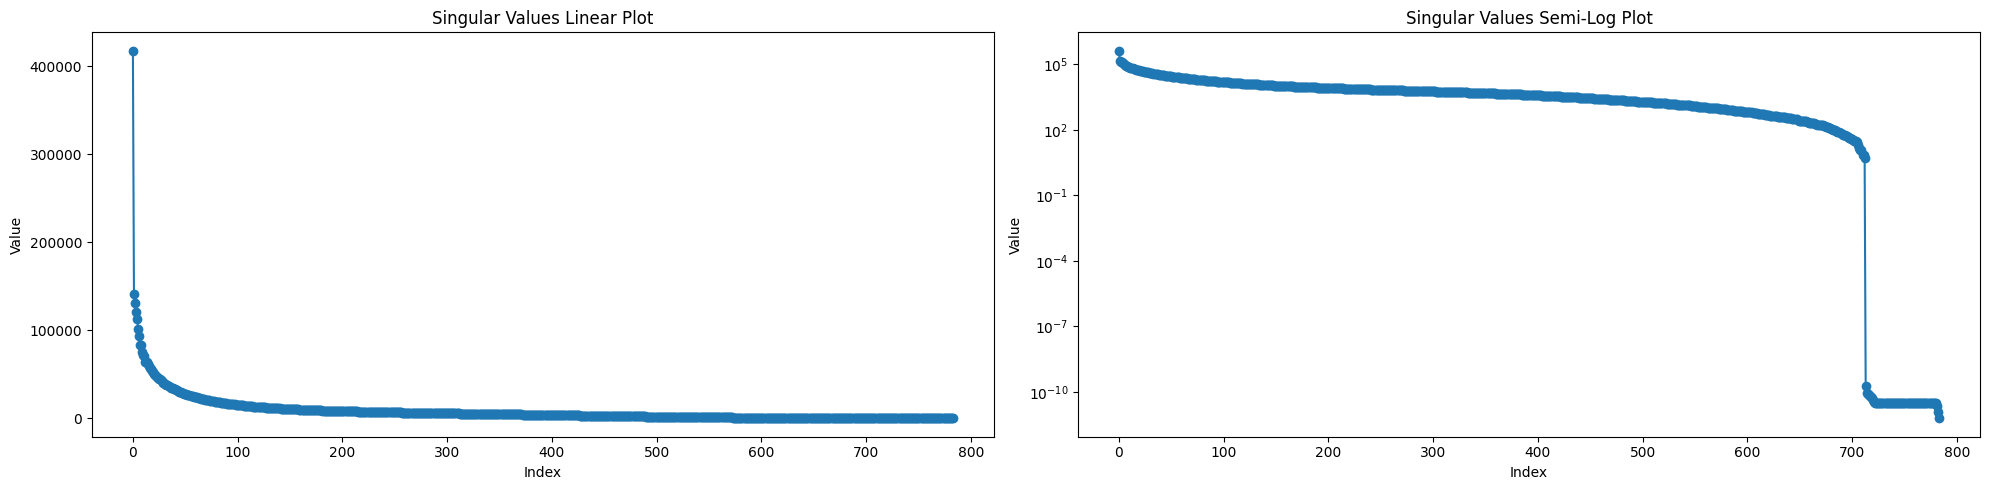

In [74]:
plot(data=E, n_plots=2)

#### The semi-log graph shows a very steep drop off around the 700th index

### Translating to Center of Image Frame

In [27]:
# Get width and height of images
width = x_train.shape[1]
height = x_train.shape[1]
print('image width: ', width)
print('image height: ', height)

image width:  28
image height:  28


In [ ]:
# Calculating translation vector b
data_center = np.mean(data_row_vectors, axis=0)
image_center = [width/2, height/2]

b_x = image_center[0] - data_center
b_y = image_center[1] - data_center
b = np.column_stack((b_x, b_y)) # add 2 dimensions
print('translation vector shape: ', b.shape)

translated_row_vectors = np.empty_like(data_row_vectors)

# Applying translation to each entry
for i in range(data_row_vectors.shape[0]):
    translated_row_vectors[i] = data_row_vectors[i] + b[:, 0]  # x translation
    translated_row_vectors[i] = data_row_vectors[i] + b[:, 1]  # y translation
    
print('translated data shape: ', translated_row_vectors.shape)

### Plotting the Translated Digits

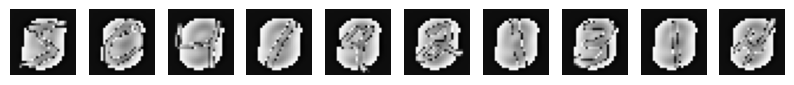

'invalid'

In [71]:
plot(data=translated_row_vectors, n_plots=10, digit_form=True)

### Running SVD on the Translated Data

In [54]:
U_translated, E_translated, Vt_translated = np.linalg.svd(translated_row_vectors, full_matrices=False)

print('U matrix shape: ', U_translated.shape)
print('E matrix shape: ', E_translated.shape)
print('V transpose matrix shape: ', Vt_translated.shape)

U matrix shape:  (70000, 784)
E matrix shape:  (784,)
V transpose matrix shape:  (784, 784)


### Plotting the Translated Singular Values

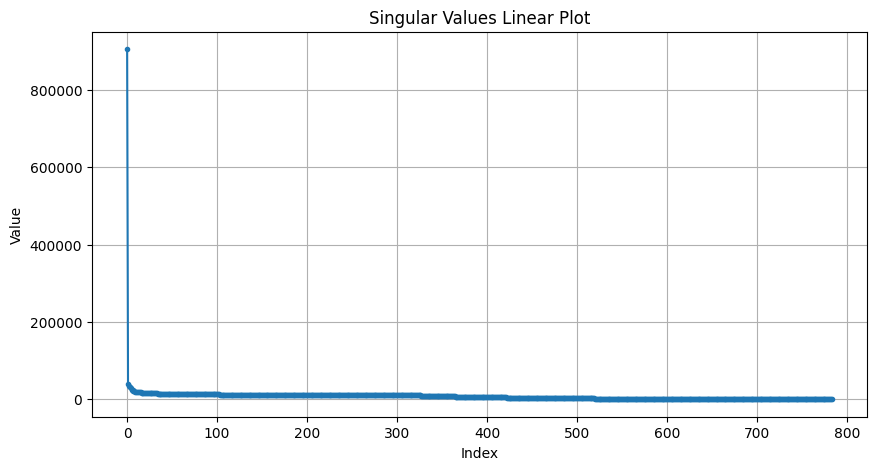

In [77]:
plot(data=E_translated, n_plots=1)

#### The translated image singular values have a steeper, faster drop-off than the non-translated images in a linear plot

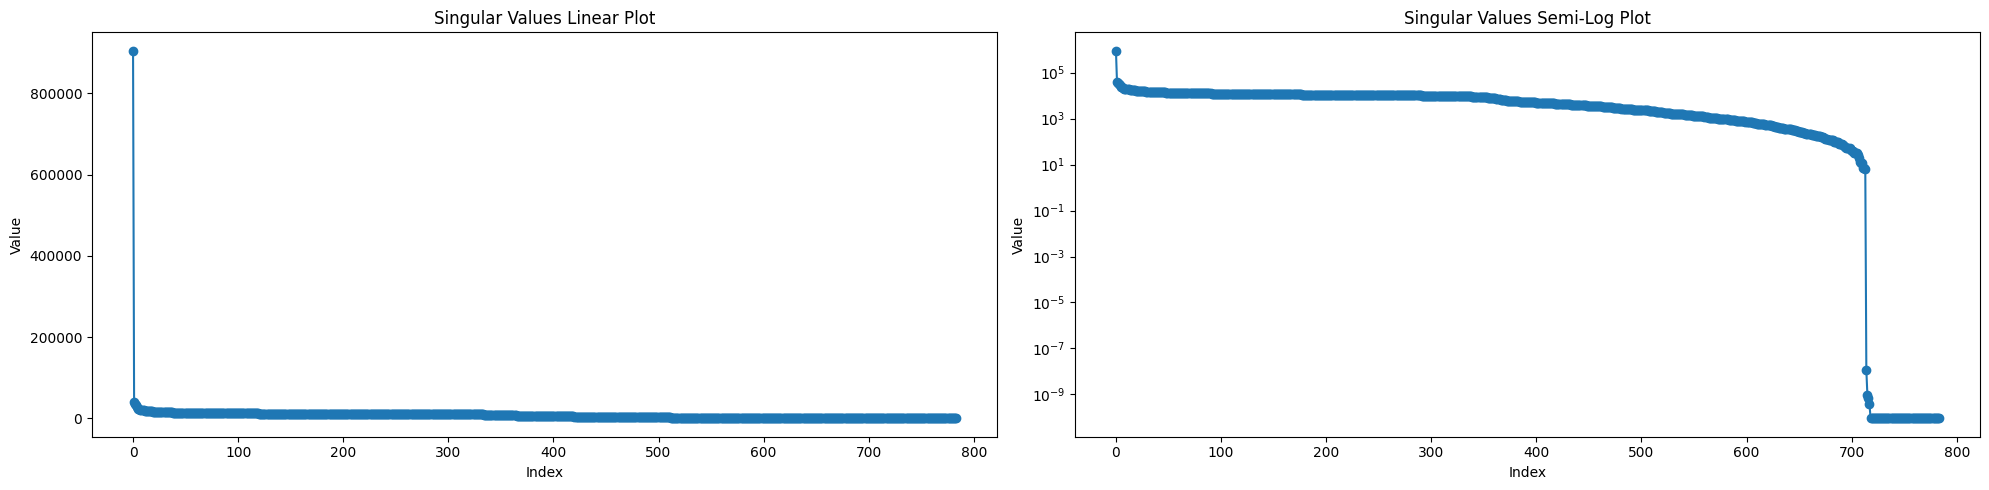

In [78]:
plot(data=E_translated, n_plots=2)

#### Semi-log plot for translated image singular values looks similar to the non-translated singular values